In [37]:
import getpass
import datetime
from datetime import date, timedelta, datetime, time
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.dates as mdates
import os
import csv
import pandas as pd

# import mplcursors

USER = getpass.getuser()

In [7]:
plt.rcParams['figure.figsize'] = [8, 5]
%matplotlib notebook

In [8]:
data_dir = pd.read_excel (r"temp_data.xlsx")

df = pd.DataFrame(data_dir)
dn = df.to_numpy()
exmatrix = np.matrix(dn)
                     
rf_list = []
zynq_list = []
batt_list = []

for x in range(0,187):
    s1 = (exmatrix[x,5].hour * 60 + exmatrix[x,5].minute) * 60 + exmatrix[x,5].second
    s2 = (exmatrix[(x+1),5].hour * 60 + exmatrix[(x+1),5].minute) * 60 + exmatrix[(x+1),5].second
    dt = s2-s1
    
    down_point_rf = exmatrix[x,6]
    down_point_zynq = exmatrix[x,7]
    down_point_batt = exmatrix[x,8]

    up_point_rf = exmatrix[(x+1),6]
    up_point_zynq = exmatrix[(x+1),7]
    up_point_batt = exmatrix[(x+1),8]

    p_dif_rf = up_point_rf - down_point_rf
    p_dif_zynq = up_point_zynq - down_point_zynq
    p_dif_batt = up_point_batt - down_point_batt

    rf_int = p_dif_rf/dt
    zynq_int = p_dif_zynq/dt
    batt_int = p_dif_batt/dt
    
    upsample_array_rf = []
    upsample_array_zynq = []
    upsample_array_batt = []
    for y in range(0,dt):
        rf_inc = down_point_rf + y*rf_int
        zynq_inc = down_point_zynq + y*zynq_int
        batt_inc = down_point_batt + y*batt_int
        
        upsample_array_rf.append(rf_inc)
        upsample_array_zynq.append(zynq_inc)
        upsample_array_batt.append(batt_inc)
      
    rf_list = rf_list + upsample_array_rf
    zynq_list = zynq_list + upsample_array_zynq
    batt_list = batt_list + upsample_array_batt

rf_therm_list = []
batt_therm_list = []
amb_in_list = []
amb_out_list = []

for x in range(0,293):
    s1 = (exmatrix[x,0].hour * 60 + exmatrix[x,0].minute) * 60 + exmatrix[x,0].second
    s2 = (exmatrix[(x+1),0].hour * 60 + exmatrix[(x+1),0].minute) * 60 + exmatrix[(x+1),0].second
    dt = s2-s1
    
    down_point_rf = exmatrix[x,1]
    down_point_batt = exmatrix[x,2]
    down_point_amb_in = exmatrix[x,3]
    down_point_amb_out = exmatrix[x,4]

    up_point_rf = exmatrix[(x+1),1]
    up_point_batt = exmatrix[(x+1),2]
    up_point_amb_in = exmatrix[(x+1),3]
    up_point_amb_out = exmatrix[(x+1),4]

    p_dif_rf = up_point_rf - down_point_rf
    p_dif_batt = up_point_batt - down_point_batt
    p_dif_amb_in = up_point_amb_in - down_point_amb_in
    p_dif_amb_out = up_point_amb_out - down_point_amb_out

    rf_int = p_dif_rf/dt
    batt_int = p_dif_batt/dt
    amb_in_int = p_dif_amb_in/dt
    amb_out_int = p_dif_amb_out/dt
    
    upsample_array_rf = []
    upsample_array_batt = []
    upsample_array_amb_in = []
    upsample_array_amb_out = []
    for y in range(0,dt):
        rf_inc = down_point_rf + y*rf_int
        batt_inc = down_point_batt + y*batt_int
        amb_in_inc = down_point_amb_in + y*amb_in_int
        amb_out_inc = down_point_amb_out + y*amb_out_int
        
        upsample_array_rf.append(rf_inc)
        upsample_array_batt.append(batt_inc)
        upsample_array_amb_in.append(amb_in_inc)
        upsample_array_amb_out.append(amb_out_inc)
      
    rf_therm_list = rf_therm_list + upsample_array_rf
    batt_therm_list = batt_therm_list + upsample_array_batt
    amb_in_list = amb_in_list + upsample_array_amb_in
    amb_out_list = amb_out_list + upsample_array_amb_out
    


<IPython.core.display.Javascript object>


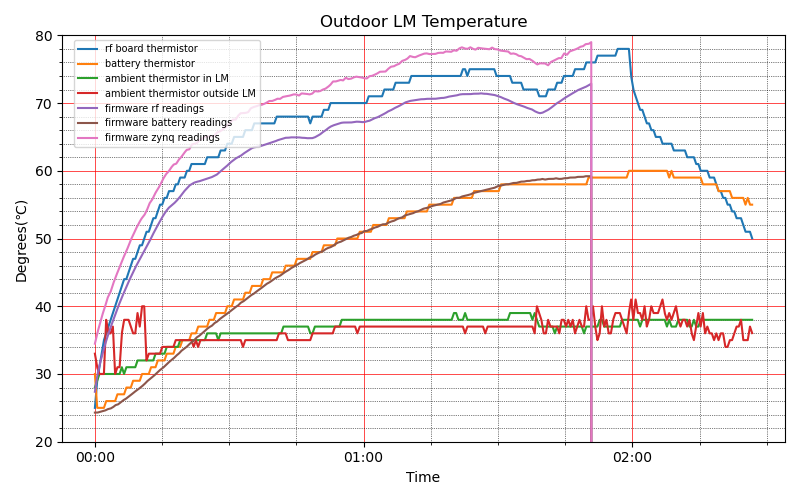

In [64]:
rf_therm_list = np.array(rf_therm_list)
batt_therm_list = np.array(batt_therm_list)
amb_in_list = np.array(amb_in_list)
amb_out_list = np.array(amb_out_list)

zeros = np.zeros(np.size(rf_therm_list)-np.size(rf_list))
zero_array = np.array(zeros)

rf_list = np.array(rf_list)
batt_list = np.array(batt_list)
zynq_list = np.array(zynq_list)

rf_list = np.append(rf_list, zero_array)
batt_list = np.append(batt_list, zero_array)
zynq_list = np.append(zynq_list, zero_array)

# time_axis = pd.read_excel(r"temp_data.xlsx", index_col=None, na_values=['NA'], usecols = "J", nrows = 8805)
# time_axis = np.array(time_axis)
# time_axis = time_axis.flatten()

start = time(0, 0, 0)
delta = timedelta(seconds=1)
times = []
n=8805

for i in range(n):
    # use complete datetime object, not only time
    dt = datetime.combine(date.today(), time(0, 0)) + delta * i
    times.append(dt)
    


# print(type(time_axis[0,0]))
# time_axis = datetime.datetime.strftime(time_axis)
# time_axis = dates.date2num(list(time_axis))
# print(np.shape(time_axis))
# print(time_axis) 
# print(type(time_axis))    
fig, ax = plt.subplots()
pd.plotting.register_matplotlib_converters()
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
plt.ylabel("Degrees(℃)")
plt.xlabel('Time')
plt.ylim(20,80)
plt.title('Outdoor LM Temperature') 
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.plot(times, rf_therm_list, label="rf board thermistor",linewidth=1.5)
plt.plot(times, batt_therm_list, label="battery thermistor", linewidth=1.5)
plt.plot(times, amb_in_list, label="ambient thermistor in LM", linewidth=1.5)
plt.plot(times, amb_out_list, label="ambient thermistor outside LM", linewidth=1.5)
plt.plot(times, rf_list, label="firmware rf readings", linewidth=1.5)
plt.plot(times, batt_list, label="firmware battery readings", linewidth=1.5)
plt.plot(times, zynq_list, label="firmware zynq readings", linewidth=1.5)

# Get only the month to show in the x-axis:
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# plt.setp(ax.get_xticklabels(), rotation = 15) 
# plt.gca().xaxis.set_major_locator(mdates.HourLocator())
# plt.plot(time_axis, batt_therm_list, label="battery thermistor")
# plt.plot(time_axis, amb_in_list, label="ambient thermistor in LM")
# plt.plot(time_axis, amb_out_list, label="ambient thermistor outside LM")
# plt.plot(time_axis, rf_list, label="firmware rf readings")
# plt.plot(time_axis, batt_list, label="firmware battery readings")
# plt.plot(time_axis, zynq_list, label="firmware zynq readings")

# xlocator = time_axis.MinuteLocator(byminute=[0,15,30,45], interval = 1)

plt.legend(bbox_to_anchor=(0.01, 1.0), loc='upper left', prop={"size":7})
plt.tight_layout()
plt.savefig("outdoor_temperature_results")


In [13]:
print(time_axis[1])
print(np.shape(time_axis))

00:00:02
(8805,)


In [39]:
start = time(0, 0, 0)
delta = timedelta(seconds=1)
times = []
n=8870

for i in range(n):
    # use complete datetime object, not only time
    dt = datetime.combine(date.today(), time(0, 0)) + delta * i
    times.append(dt)
    
print(times)    

[datetime.datetime(2020, 7, 31, 0, 0), datetime.datetime(2020, 7, 31, 0, 0, 1), datetime.datetime(2020, 7, 31, 0, 0, 2), datetime.datetime(2020, 7, 31, 0, 0, 3), datetime.datetime(2020, 7, 31, 0, 0, 4), datetime.datetime(2020, 7, 31, 0, 0, 5), datetime.datetime(2020, 7, 31, 0, 0, 6), datetime.datetime(2020, 7, 31, 0, 0, 7), datetime.datetime(2020, 7, 31, 0, 0, 8), datetime.datetime(2020, 7, 31, 0, 0, 9), datetime.datetime(2020, 7, 31, 0, 0, 10), datetime.datetime(2020, 7, 31, 0, 0, 11), datetime.datetime(2020, 7, 31, 0, 0, 12), datetime.datetime(2020, 7, 31, 0, 0, 13), datetime.datetime(2020, 7, 31, 0, 0, 14), datetime.datetime(2020, 7, 31, 0, 0, 15), datetime.datetime(2020, 7, 31, 0, 0, 16), datetime.datetime(2020, 7, 31, 0, 0, 17), datetime.datetime(2020, 7, 31, 0, 0, 18), datetime.datetime(2020, 7, 31, 0, 0, 19), datetime.datetime(2020, 7, 31, 0, 0, 20), datetime.datetime(2020, 7, 31, 0, 0, 21), datetime.datetime(2020, 7, 31, 0, 0, 22), datetime.datetime(2020, 7, 31, 0, 0, 23), date